# Import packages and data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
TRAIN_SET = '../data/Hotel-A-train.csv'
VAL_SET = '../data/Hotel-A-validation.csv'

In [3]:
df = pd.read_csv(TRAIN_SET, index_col='Reservation-id', parse_dates=['Expected_checkin', 'Expected_checkout'])

In [4]:
df_val = pd.read_csv(VAL_SET, index_col='Reservation-id', parse_dates=['Expected_checkin', 'Expected_checkout'])

In [5]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

# Dataset Statistics

In [145]:
df.index.value_counts()

91130744    2
76641511    2
95504255    2
55371044    2
14692111    1
           ..
52434071    1
20278424    1
77227399    1
52382876    1
84871169    1
Name: Reservation-id, Length: 27495, dtype: int64

In [143]:
df.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
Reservation-id,,,,,,,,,,,,,,,,,,,,
39428300,1,40,1,1,1,1,1,2,2,0,1,1,1,1,1,1,1,1,10,218
77491756,1,49,1,2,2,2,1,3,3,0,1,1,1,2,1,1,1,2,0,185
73747291,1,42,2,1,1,2,1,3,3,0,1,1,1,1,1,1,1,2,0,119
67301739,2,25,3,3,3,3,2,4,3,0,1,1,1,2,2,1,1,1,5,144
77222321,1,62,1,4,4,2,3,1,1,0,1,1,1,1,3,2,1,1,10,242


In [5]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [6]:
df.dtypes

Gender                            object
Age                                int64
Ethnicity                         object
Educational_Level                 object
Income                            object
Country_region                    object
Hotel_Type                        object
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date                      object
Adults                             int64
Children                           int64
Babies                             int64
Meal_Type                         object
Visted_Previously                 object
Previous_Cancellations            object
Deposit_type                      object
Booking_channel                   object
Required_Car_Parking              object
Reservation_Status                object
Use_Promotion                     object
Discount_Rate                      int64
Room_Rate                          int64
dtype: object

In [7]:
df.shape

(27499, 23)

In [8]:
df.index.nunique()

27495

<AxesSubplot:>

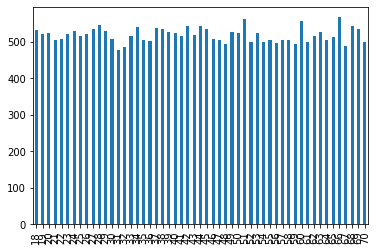

In [9]:
df.Age.value_counts().sort_index().plot.bar()

# Gender

Text(0.5, 1.0, 'District vs Base Pack')

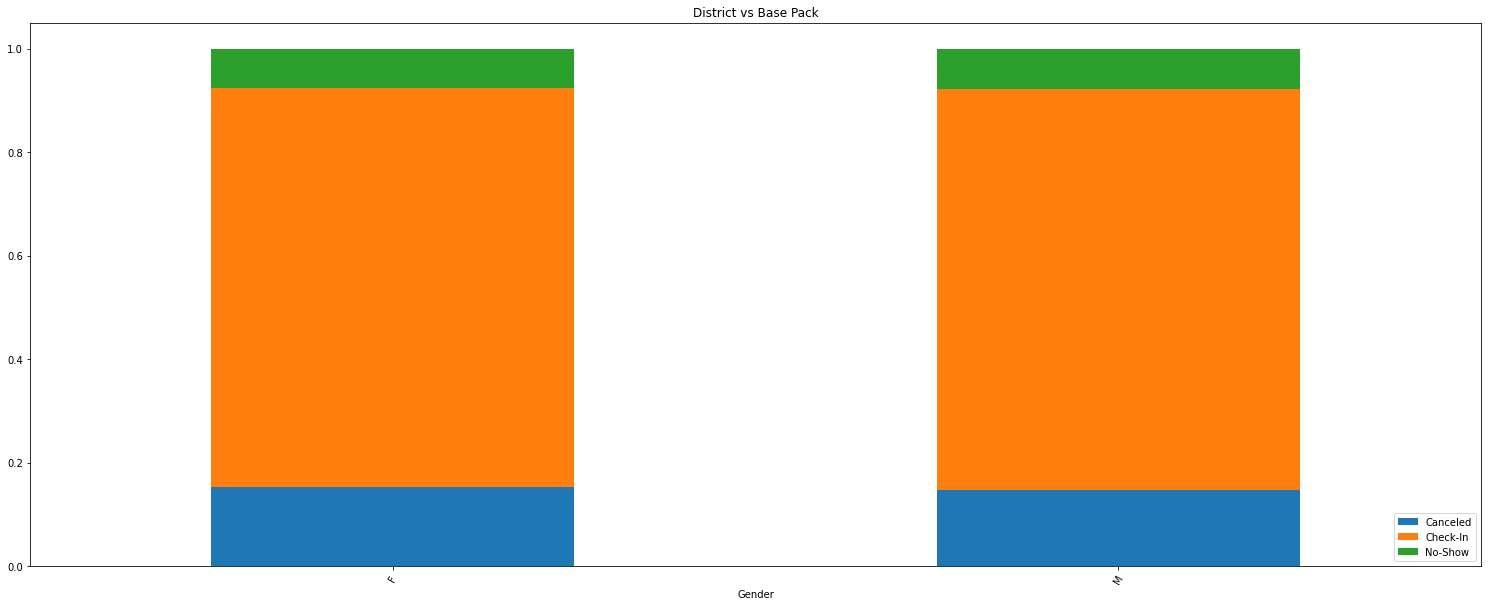

In [6]:
df_gender = df.groupby('Gender').Reservation_Status.value_counts().unstack().sort_index()
df_gender.divide(df_gender.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(26,10), rot=60)
plt.legend(loc='lower right')
plt.title("District vs Base Pack")